# Linear Regression Model
### With dataset as a txt

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset into memory

In [3]:
df = pd.read_table('../Datasets/SALES.txt', delim_whitespace=True, header=None)

/tmp/ipykernel_3223/3688368297.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table('../Datasets/SALES.txt', delim_whitespace=True, header=None)


In [4]:
df.columns = ['Advertising', 'Sales']

## EDA
#### Exploratory Data Analysis

In [5]:
print(df.shape)

(36, 2)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Advertising  36 non-null     float64
 1   Sales        36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes
None


In [7]:
print(df.describe())

       Advertising      Sales
count    36.000000  36.000000
mean     24.255556  28.527778
std       6.185118  18.777625
min      12.000000   1.000000
25%      20.300000  15.750000
50%      24.250000  23.000000
75%      28.600000  41.000000
max      36.500000  65.000000


In [8]:
print(df.quantile([0.25,0.5,0.75]))

      Advertising  Sales
0.25        20.30  15.75
0.50        24.25  23.00
0.75        28.60  41.00


## Declaring Feature Variables 

In [9]:
X = df['Advertising'].values.reshape(-1,1)
Y = df['Sales'].values.reshape(-1,1)

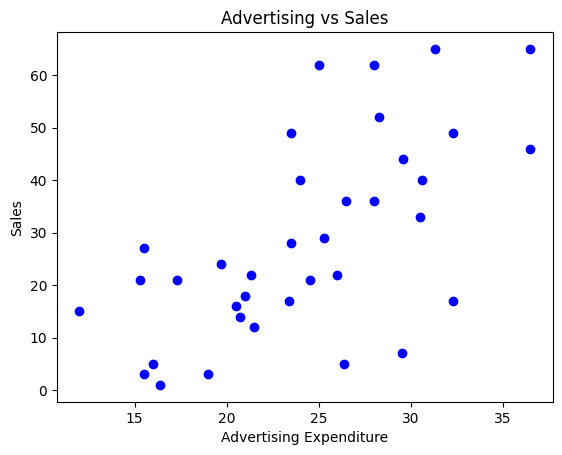

In [10]:
plt.scatter(X, Y, color='blue', marker='o', label='Data points')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Advertising vs Sales')
plt.show()

In [11]:
X.shape, Y.shape

((36, 1), (36, 1))

## Splitting the Data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4983)

In [13]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(28, 1) (8, 1) (28, 1) (8, 1)


## Building the Model

In [14]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [15]:
lr_model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred = lr_model.predict(X_test)
y_pred

array([[32.56965147],
       [39.35331225],
       [22.20572527],
       [22.58259531],
       [12.78397418],
       [13.72614929],
       [27.85877592],
       [24.09007549]])

In [17]:
a = lr_model.coef_
b = lr_model.intercept_
print(f'Coefficient (a): {a[0][0]}')
print(f'Intercept (b): {b[0]}')

Coefficient (a): 1.8843502181389777
Intercept (b): -16.42345420269538


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9.150902610368169


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(f"R2 square of the model is : {r2}")

R2 square of the model is : 0.34706418257744276


## Ploting Comparison between Input data and model prediction

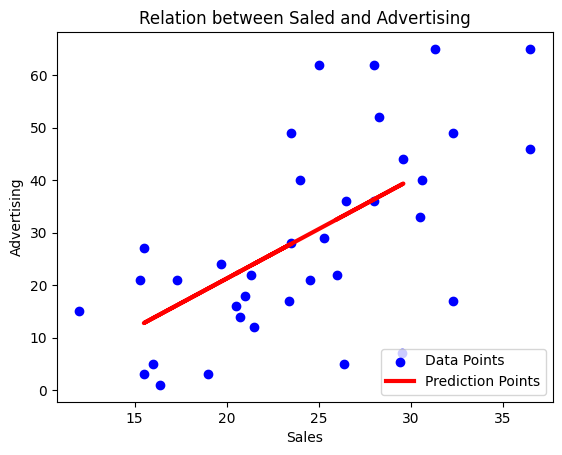

In [22]:
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Prediction Points', linewidth=3)
plt.title("Relation between Saled and Advertising")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.legend(loc=4)
plt.show()

In [24]:
print("Training Set Score: {:.4f}".format(lr_model.score(X_train, Y_train)))
print("Testing Set Score: {:.4f}".format(lr_model.score(X_test, Y_test)))

Training Set Score: 0.3680
Testing Set Score: 0.3471
